# Exploratory Data Analysis (EDA)

In here, we are going to find some more obvious patterns with EDA, before identifying the hidden patterns with Machine Learning techniques. We are going to look the following for each comedian:

1. __Most common words__ - find these and create word clouds of them
2. __Size of vocabulary__ - look for the number of unique words for each comedian and also how quickly they speak
3. __Anount of profanity__ - most common terms

## Most Common Words

In [1]:
# Load the Document-Term Matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')

In [4]:
data = data.transpose()
data.head()

,ali_wong,anthony_jeselnik,bill_burr,bo_burnham,dave_chapelle,hasan_minhaj,jim_jefferies,joe_rogan,john_mulaney,louis_ck,mike_birbiglia,ricky_gervais,russell_peters
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0,0


In [21]:
data.ali_wong[data.ali_wong.values > 20]

dont      61
gonna     28
gotta     21
im        74
just      64
know      65
like     126
lot       24
oh        21
ok        26
shit      34
thats     34
wanna     21
youre     31
Name: ali_wong, dtype: int64

In [22]:
# Find the top 30 words said by each comedian
top_dict = {}

for c in data.columns:
    words = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(words.index, words.values))
    
top_dict

{'ali_wong': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('gotta', 21),
  ('wanna', 21),
  ('husband', 20),
  ('right', 19),
  ('time', 19),
  ('got', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('god', 14),
  ('hes', 14),
  ('need', 14),
  ('tell', 13),
  ('yeah', 13),
  ('dude', 12),
  ('really', 12)],
 'anthony_jeselnik': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('got', 34),
  ('joke', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('say', 26),
  ('just', 26),
  ('day', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('grandma', 18),
  ('right', 18),
  ('thing', 17),
  ('time', 17),
  ('think', 17),
  ('good', 16),
  ('school', 16),
  ('did', 16),
  ('jokes', 16),
  ('yeah', 16),
  ('gonna', 15),
  ('ive', 15),
  ('baby', 15),
  ('

In [23]:
# Print the top 15 words said by each comedian
for comedian, words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in words[0:14]]))
    print('=-=-=-=-=-=')

ali_wong
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, oh, gotta, wanna
=-=-=-=-=-=
anthony_jeselnik
im, like, know, dont, got, joke, thats, said, anthony, say, just, day, guys, people
=-=-=-=-=-=
bill_burr
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
=-=-=-=-=-=
bo_burnham
know, like, think, im, love, just, bo, stuff, repeat, dont, yeah, want, right, cos
=-=-=-=-=-=
dave_chapelle
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
=-=-=-=-=-=
hasan_minhaj
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
=-=-=-=-=-=
jim_jefferies
like, im, dont, right, fucking, know, just, went, youre, people, thats, day, oh, think
=-=-=-=-=-=
joe_rogan
like, people, just, dont, fucking, im, fuck, thats, gonna, theyre, know, youre, think, shit
=-=-=-=-=-=
john_mulaney
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, got, time
=-=-=-=-=-=
louis_ck


__NOTE:__ before we use word clouds, we will remove the stop words first

In [41]:
# Look at the most common top words from the comedians and add them to the stop word list
from collections import Counter

words = []
for c in data.columns:
    for word,count in top_dict[c]:
        words.append(word)

In [50]:
# identify the most common words in the list
Counter(words).most_common()

[('like', 13),
 ('im', 13),
 ('know', 13),
 ('just', 13),
 ('dont', 13),
 ('thats', 13),
 ('right', 13),
 ('people', 13),
 ('youre', 12),
 ('got', 11),
 ('gonna', 9),
 ('time', 9),
 ('think', 9),
 ('oh', 8),
 ('cause', 7),
 ('yeah', 7),
 ('said', 7),
 ('say', 7),
 ('shit', 6),
 ('hes', 6),
 ('really', 6),
 ('good', 6),
 ('fucking', 6),
 ('want', 6),
 ('going', 6),
 ('theyre', 6),
 ('day', 5),
 ('thing', 5),
 ('fuck', 5),
 ('didnt', 5),
 ('theres', 5),
 ('did', 4),
 ('little', 4),
 ('man', 4),
 ('tell', 3),
 ('guys', 3),
 ('ive', 3),
 ('guy', 3),
 ('come', 3),
 ('life', 3),
 ('hey', 3),
 ('white', 3),
 ('went', 3),
 ('mean', 3),
 ('ok', 2),
 ('lot', 2),
 ('women', 2),
 ('dude', 2),
 ('joke', 2),
 ('make', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('look', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('id', 2),
 ('uh', 2),
 ('gotta', 1),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('need', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('school', 1),
 ('jokes', 1),
 ('ba

In [85]:
# If more than half of the comedians have it as a top words, we will add them to the stopword list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 7]

In [86]:
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'time',
 'think',
 'oh',
 'said',
 'say']

In [89]:
# Update the Document-Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

data_clean = pd.read_pickle('df_clean.pkl')

# add the stop word list
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [57]:
# recreate the document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

In [63]:
# Pickle for later use
import pickle

pickle.dump(cv,open('cv_stop.pkl','wb'))
data_stop.to_pickle('dtm_stop.pkl')

In [91]:
# Let's start creating visualizations!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=150, random_state=26)

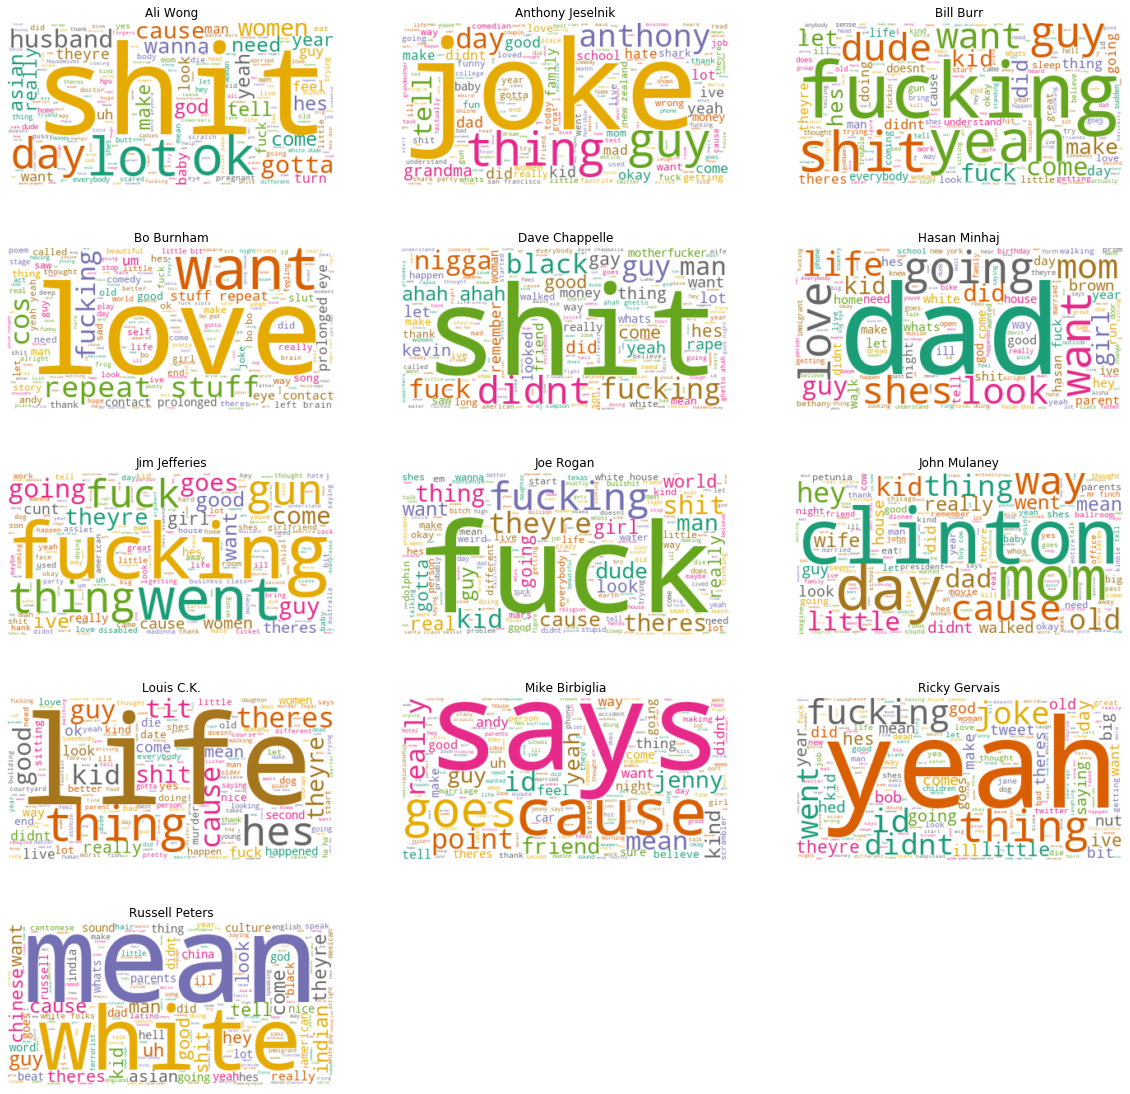

In [92]:
# Reset the output dimension
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais', 'Russell Peters']

for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(5,3, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(full_names[index])
    
plt.show()

__Findings__

* It seems Russell likes to use racial feature for his jokes.
* A lot of other comedians in the last 6 years use the F-word.

## Number of Words

In [98]:
data.russell_peters.to_numpy().nonzero()[0].size

1156

In [99]:
# Find the number of unique words that each comedian uses
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian','unique_words'])
data_words

,comedian,unique_words
0,Ali Wong,1341
1,Anthony Jeselnik,983
2,Bill Burr,1633
3,Bo Burnham,1272
4,Dave Chappelle,1404
5,Hasan Minhaj,1559
6,Jim Jefferies,1313
7,Joe Rogan,1435
8,John Mulaney,1391
9,Louis C.K.,1098


In [100]:
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,983
9,Louis C.K.,1098
12,Russell Peters,1156
3,Bo Burnham,1272
6,Jim Jefferies,1313
0,Ali Wong,1341
8,John Mulaney,1391
4,Dave Chappelle,1404
7,Joe Rogan,1435
10,Mike Birbiglia,1494


In [102]:
# Calculate the words per minute for each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Check the runtime in minutes from IMDB
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79, 72]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times

In [104]:
data_words['words_per_minute'] = data_words.total_words / data_words.run_times
data_words

,comedian,unique_words,total_words,run_times,words_per_minute
0,Ali Wong,1341,3283,60,54.716667
1,Anthony Jeselnik,983,2905,59,49.237288
2,Bill Burr,1633,5535,80,69.187500
3,Bo Burnham,1272,3165,60,52.750000
4,Dave Chappelle,1404,4094,67,61.104478
5,Hasan Minhaj,1559,4777,73,65.438356
6,Jim Jefferies,1313,4764,77,61.870130
7,Joe Rogan,1435,4579,63,72.682540
8,John Mulaney,1391,4001,62,64.532258
9,Louis C.K.,1098,3332,58,57.448276


In [105]:
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,983,2905,59,49.237288
3,Bo Burnham,1272,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1404,4094,67,61.104478
6,Jim Jefferies,1313,4764,77,61.870130
10,Mike Birbiglia,1494,4741,76,62.381579
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1391,4001,62,64.532258
5,Hasan Minhaj,1559,4777,73,65.438356


In [106]:
# Plot the data
import numpy as np

y_pos = np.arange(len(data_words))
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

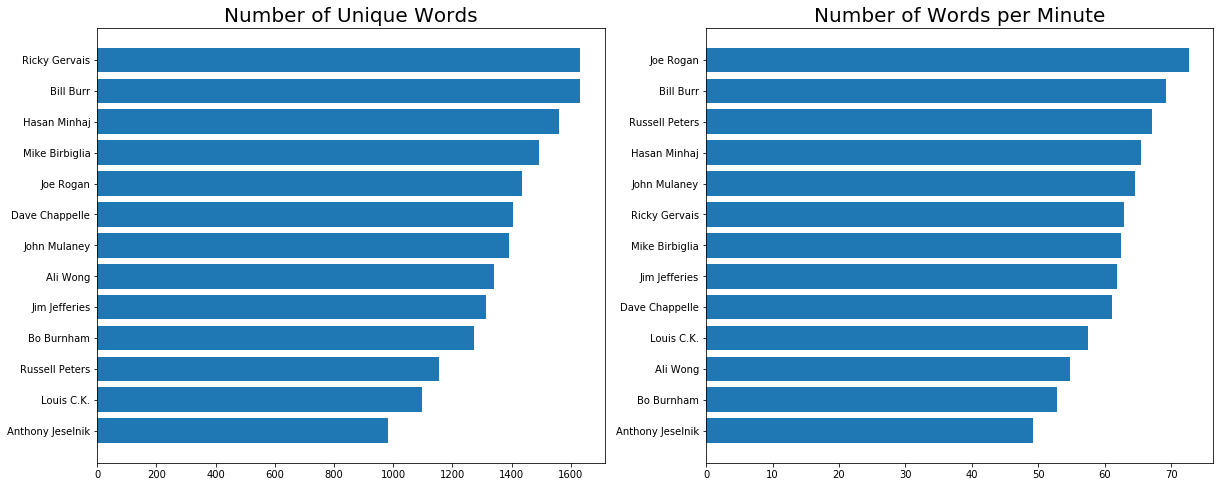

In [114]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.barh(y_pos, data_unique_sort.unique_words, align = 'center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1,2,2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words per Minute', fontsize=20)

#plt.tight_layout()
plt.show()

__Findings:__

* __Vocabulary__
    * Ricky Gervais (British Comedy) and Bill Burr (Podcast Host) use a lot of words in their comedy.
    * Louis C.K. (Self-deprecating Comedy) and Anthony Jeselnik (Dark Humor) have a smaller vocabulary
    
* __Talking Speed__
    * Joe Rogan (Blue Comedy) and Bill Burr (Podcast host) talk fast
    * Bo Burnham (Musical Comedy) and Anthony Jeselnik (Dark Humor) talk slow
    
Russell Peters is somewhere in the middle for both cases

## Amount of Profanity

In [115]:
Counter(words).most_common()

[('like', 13),
 ('im', 13),
 ('know', 13),
 ('just', 13),
 ('dont', 13),
 ('thats', 13),
 ('right', 13),
 ('people', 13),
 ('youre', 12),
 ('got', 11),
 ('gonna', 9),
 ('time', 9),
 ('think', 9),
 ('oh', 8),
 ('cause', 7),
 ('yeah', 7),
 ('said', 7),
 ('say', 7),
 ('shit', 6),
 ('hes', 6),
 ('really', 6),
 ('good', 6),
 ('fucking', 6),
 ('want', 6),
 ('going', 6),
 ('theyre', 6),
 ('day', 5),
 ('thing', 5),
 ('fuck', 5),
 ('didnt', 5),
 ('theres', 5),
 ('did', 4),
 ('little', 4),
 ('man', 4),
 ('tell', 3),
 ('guys', 3),
 ('ive', 3),
 ('guy', 3),
 ('come', 3),
 ('life', 3),
 ('hey', 3),
 ('white', 3),
 ('went', 3),
 ('mean', 3),
 ('ok', 2),
 ('lot', 2),
 ('women', 2),
 ('dude', 2),
 ('joke', 2),
 ('make', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('look', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('id', 2),
 ('uh', 2),
 ('gotta', 1),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('need', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('school', 1),
 ('jokes', 1),
 ('ba

In [123]:
# isolating the bad words
data_bad_words = data.transpose()[['fucking','fuck','shit']]
data_bad_words

,fucking,fuck,shit
ali_wong,5,11,34
anthony_jeselnik,6,9,9
bill_burr,70,36,63
bo_burnham,22,15,6
dave_chapelle,32,33,45
hasan_minhaj,8,16,15
jim_jefferies,78,37,20
joe_rogan,69,66,40
john_mulaney,2,2,6
louis_ck,6,15,25


In [126]:
data_profanity = pd.concat([data_bad_words.fuck + data_bad_words.fucking, data_bad_words.shit], axis=1 )
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali_wong,16,34
anthony_jeselnik,15,9
bill_burr,106,63
bo_burnham,37,6
dave_chapelle,65,45
hasan_minhaj,24,15
jim_jefferies,115,20
joe_rogan,135,40
john_mulaney,4,6
louis_ck,21,25


In [129]:
data_profanity.f_word.loc['ali_wong']

16

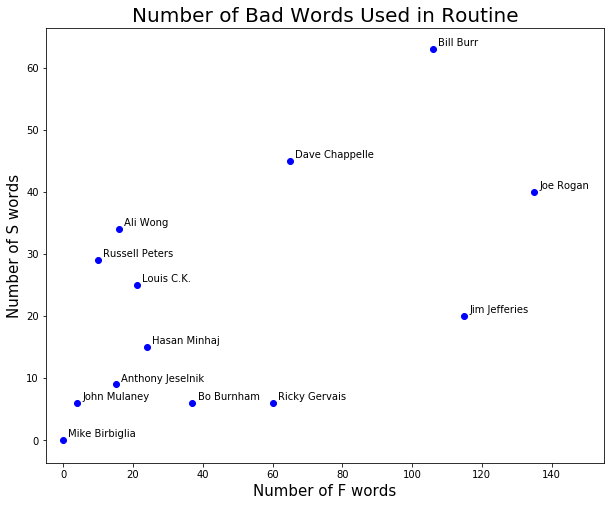

In [133]:
# Let's do some more plotting
plt.figure(figsize=(10,8))

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x,y,color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5,155)
    #plt.ylim(0,60)
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F words', fontsize=15)
plt.ylabel('Number of S words', fontsize=15)

plt.show()

In [134]:
# Mixed with racial terms (because Russell Peters use that a lot)

# isolating the bad words
data_bad_words = data.transpose()[['fucking','fuck','shit','black','white','asian']]
data_bad_words

,fucking,fuck,shit,black,white,asian
ali_wong,5,11,34,4,11,11
anthony_jeselnik,6,9,9,1,2,0
bill_burr,70,36,63,1,7,0
bo_burnham,22,15,6,1,2,0
dave_chapelle,32,33,45,31,12,6
hasan_minhaj,8,16,15,0,20,0
jim_jefferies,78,37,20,6,7,2
joe_rogan,69,66,40,2,24,0
john_mulaney,2,2,6,3,4,0
louis_ck,6,15,25,1,2,0


In [135]:
data_mixed = pd.concat([data_bad_words.fuck + data_bad_words.fucking + data_bad_words.shit, 
                        data_bad_words.black + data_bad_words.white + data_bad_words.asian], axis=1 )
data_mixed.columns = ['profanity', 'racial']
data_mixed

,profanity,racial
ali_wong,50,26
anthony_jeselnik,24,3
bill_burr,169,8
bo_burnham,43,3
dave_chapelle,110,49
hasan_minhaj,39,20
jim_jefferies,135,15
joe_rogan,175,26
john_mulaney,10,7
louis_ck,46,3


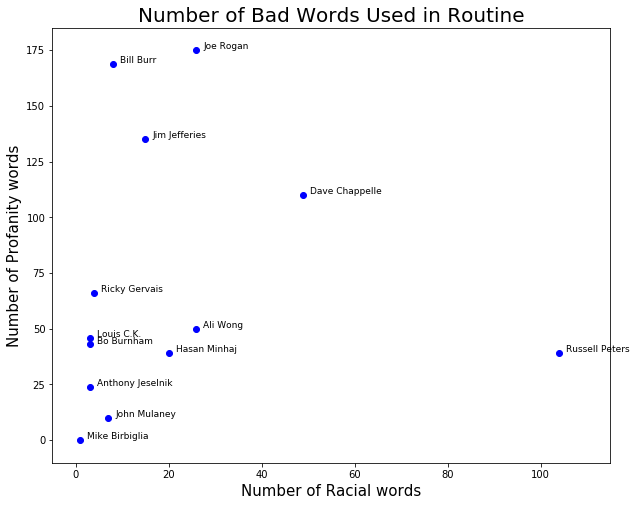

In [150]:
# Let's do some more plotting
plt.figure(figsize=(10,8))

for i, comedian in enumerate(data_mixed.index):
    x = data_mixed.racial.loc[comedian]
    y = data_mixed.profanity.loc[comedian]
    plt.scatter(x,y,color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=9)
    plt.xlim(-5,115)
    #plt.ylim(0,60)
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of Racial words', fontsize=15)
plt.ylabel('Number of Profanity words', fontsize=15)

plt.show()

__Findings:__

* While Russell does not swear much, he uses racial words a lot, in fact, he's the furthest in terms of racial words!
* When we check back at the table, we can see that Russell use the word 'white' a lot.
* I probably like comedians that use racial and profanity words moderately?
* Comedians that use racial and profanity words moderately are: Ali Wong, Hasan Minhaj
* Dave Chappelle is in the 2nd position in terms of racial words use, however he use profanity words a lot, might need to check on him again.